# Final Project - Exploratory Data Analysis - Predicting Airline Delay

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

from scipy import stats
import seaborn as sns

#This will render the plots inline
%matplotlib inline

In [3]:
#Import the Airline Delay data in csv format
fltdata = pd.read_csv('/Users/Prakash/GA/PROJECTS/airlinedelaycauses-DelayedFlights.csv')

In [4]:
#Check the Size of the data (How many Rows and Columns)
fltdata.shape

(1936758, 30)

In [5]:
# Display the header to show how the dataset looks like
fltdata.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
#Verify if all the data is for the year 2008

print 'Total data for the year 2008: {}'.format( len(fltdata[fltdata['Year'] == 2008]))
print 'Total data for non 2008 year: {}' .format (len(fltdata[fltdata['Year'] != 2008]))

Total data for the year 2008: 1936758
Total data for non 2008 year: 0


In [7]:
#Print the header for different types of delay
fltdata[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].head()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-14.0,8.0,NaN,NaN,NaN,NaN,NaN
1,2.0,19.0,NaN,NaN,NaN,NaN,NaN
2,14.0,8.0,NaN,NaN,NaN,NaN,NaN
3,34.0,34.0,2.0,0.0,0.0,0.0,32.0
4,11.0,25.0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Split the data to have limited data as train data since the data set is very large. 
# Using this only for analysis purpose and for model trainign would use the complete dataset.
# Plotting graphs was too much time consuming with so much data so used a subset of that data.

#X_train, X_test = train_test_split(fltdata, train_size=0.3)
#print X_train.shape
#print X_test.shape
#data = X_train

data = fltdata.sample(n=100000)
print 'Length of original data set is : {} '.format(fltdata.shape)
print 'Reduced set of data size is : {} '.format(data.shape)


Length of original data set is : (1936758, 30) 
Reduced set of data size is : (100000, 30) 


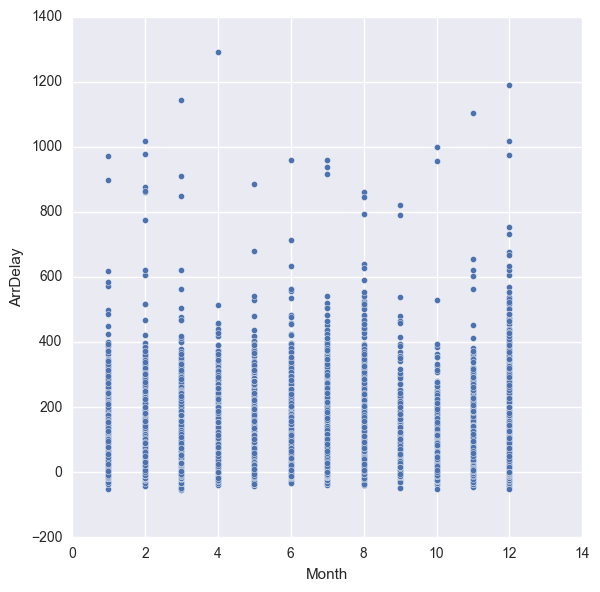

In [9]:
#Plot the Arrival Dealy to show which month has the maximum delay
sns.pairplot(data, x_vars='Month', y_vars='ArrDelay', kind='scatter', size=6)

In [10]:
#cross tabulation of Day of Week and Month
pd.crosstab(data.DayOfWeek,data.Month)

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
1,1222,1454,1756,1053,1038,1685,1412,1199,928,704,617,1917
2,1530,1421,1203,1181,966,1300,1377,1069,705,580,565,1628
3,1420,1328,1302,1088,1095,1326,1429,957,514,789,635,1648
4,1785,1332,1294,1256,1412,1561,1616,1128,654,917,767,1238
5,1354,2104,1610,1537,1656,1588,1115,1605,890,1056,873,1402
6,901,888,1536,906,926,1149,962,1138,532,482,770,1235
7,1267,1302,1752,1108,803,1806,1383,1221,786,803,1236,1317


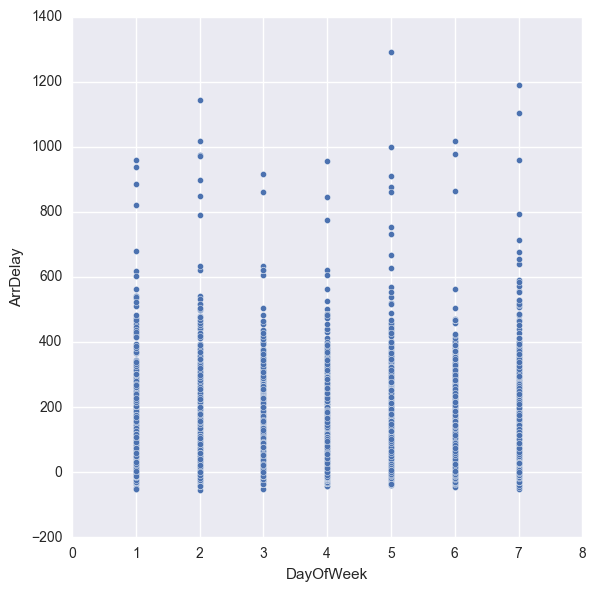

In [11]:
#Plot the Arrival Dealy to show which Day of week has the maximum delay
sns.pairplot(data, x_vars='DayOfWeek', y_vars='ArrDelay', kind='scatter', size=6)

In [12]:
#Count the number of flights which had on time arrival
len(fltdata[fltdata['ArrDelay'] == 0])

#len(fltdata[fltdata['Year'] == 2008]) 

27040

In [13]:
#Count the number of flights which had late arrival
len(fltdata[fltdata['ArrDelay'] > 0])

1723415

In [14]:
#Count the number of flights which were ahead of the arrival schedule
len(fltdata[fltdata['ArrDelay'] < 0])

177916

In [15]:
#What was the maximum delay in minutes
fltdata['ArrDelay'].max()

2461.0

In [16]:
#Confirm that was the maximum delay
len(fltdata[fltdata['ArrDelay'] > 2461])

0

In [17]:
#Print the row where there was maximum Flight Delay

fltdata.loc[fltdata['ArrDelay'].argmax()]

Unnamed: 0           1018798
Year                    2008
Month                      2
DayofMonth                 3
DayOfWeek                  7
DepTime                 1117
CRSDepTime              1820
ArrTime                 2256
CRSArrTime               555
UniqueCarrier             NW
FlightNum                808
TailNum               N817NW
ActualElapsedTime        459
CRSElapsedTime           455
AirTime                  437
ArrDelay                2461
DepDelay                2457
Origin                   HNL
Dest                     MSP
Distance                3972
TaxiIn                     6
TaxiOut                   16
Cancelled                  0
CancellationCode           N
Diverted                   0
CarrierDelay            1455
WeatherDelay               0
NASDelay                   4
SecurityDelay              0
LateAircraftDelay       1002
Name: 322516, dtype: object

In [18]:
#What was the earliest arrival time
fltdata['ArrDelay'].min()

-109.0

In [19]:
#Confirm that was the earliest arrival time
len(fltdata[fltdata['ArrDelay'] < -109])

0

In [20]:
#Print the row with earliest arrival Flight

fltdata.loc[fltdata['ArrDelay'].argmin()]

Unnamed: 0           3698229
Year                    2008
Month                      7
DayofMonth                31
DayOfWeek                  4
DepTime                 1449
CRSDepTime              1430
ArrTime                 1331
CRSArrTime              1520
UniqueCarrier             WN
FlightNum                987
TailNum               N396SW
ActualElapsedTime         42
CRSElapsedTime           170
AirTime                   29
ArrDelay                -109
DepDelay                  19
Origin                   AUS
Dest                     SAN
Distance                1164
TaxiIn                     3
TaxiOut                   10
Cancelled                  0
CancellationCode           N
Diverted                   0
CarrierDelay             NaN
WeatherDelay             NaN
NASDelay                 NaN
SecurityDelay            NaN
LateAircraftDelay        NaN
Name: 1110539, dtype: object

In [21]:
#What are the different carrier in the dataset?
data.UniqueCarrier.unique()

array(['WN', 'US', 'XE', 'AA', 'UA', 'OO', '9E', 'YV', 'FL', 'MQ', 'AS',
       'NW', 'DL', 'CO', 'HA', 'EV', 'AQ', 'F9', 'B6', 'OH'], dtype=object)

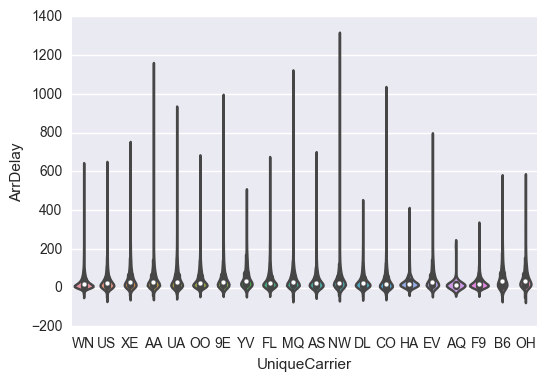

In [22]:
#Plot the delay for each carrier
sns.violinplot(x=data.UniqueCarrier,y=data.ArrDelay,)